# Анализ МРТ данных 

In [2]:
import rarfile
import re
import shutil
import os
import glob
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import phik
import networkx as nx

##  Предобработка данных

### Предобработка архива

In [424]:
rar_path = 'данные/TimeCourses.rar'
extract_to = 'данные'
extracted_folder = 'данные/TimeCourses'

# Если папка уже существует, удаляем её
if os.path.exists(extracted_folder):
    shutil.rmtree(extracted_folder)

with rarfile.RarFile(rar_path) as rf:
    rf.extractall(path=extract_to)

print(f"Файлы извлечены в {extract_to}")

BadRarFile: Corrupt file - CRC check failed: TimeCourses/sub-OAS30762/sub-OAS30762_run1_timecourses.mat - exp=2587894035 got=21064832

Составим список названий столбцов, который будем прикреплять к таблицам:

In [ ]:
labels_path = "данные/aal_labels.rtf"

with open(labels_path, "r", encoding="utf-8") as file:
    text = file.read()

matches = re.findall(r"(\d+)\s+([\w\d_]+)\s+\1", text)
brain_regions = [match[1] for match in matches]

print([(i+1, brain_regions[i]) for i in range(len(brain_regions))])
print(f"Количество областей мозга: {len(brain_regions)}")

[(1, 'Precentral_L'), (2, 'Precentral_R'), (3, 'Frontal_Sup_2_L'), (4, 'Frontal_Sup_2_R'), (5, 'Frontal_Mid_2_L'), (6, 'Frontal_Mid_2_R'), (7, 'Frontal_Inf_Oper_L'), (8, 'Frontal_Inf_Oper_R'), (9, 'Frontal_Inf_Tri_L'), (10, 'Frontal_Inf_Tri_R'), (11, 'Frontal_Inf_Orb_2_L'), (12, 'Frontal_Inf_Orb_2_R'), (13, 'Rolandic_Oper_L'), (14, 'Rolandic_Oper_R'), (15, 'Supp_Motor_Area_L'), (16, 'Supp_Motor_Area_R'), (17, 'Olfactory_L'), (18, 'Olfactory_R'), (19, 'Frontal_Sup_Medial_L'), (20, 'Frontal_Sup_Medial_R'), (21, 'Frontal_Med_Orb_L'), (22, 'Frontal_Med_Orb_R'), (23, 'Rectus_L'), (24, 'Rectus_R'), (25, 'OFCmed_L'), (26, 'OFCmed_R'), (27, 'OFCant_L'), (28, 'OFCant_R'), (29, 'OFCpost_L'), (30, 'OFCpost_R'), (31, 'OFClat_L'), (32, 'OFClat_R'), (33, 'Insula_L'), (34, 'Insula_R'), (35, 'Cingulate_Mid_L'), (36, 'Cingulate_Mid_R'), (37, 'Cingulate_Post_L'), (38, 'Cingulate_Post_R'), (39, 'Hippocampus_L'), (40, 'Hippocampus_R'), (41, 'ParaHippocampal_L'), (42, 'ParaHippocampal_R'), (43, 'Amygdala_L

### Предобработка данных респондентов (объединение csv файлов и построение матрицы корреляций)

Для каждого человека

1) объединяем 2 файла с временными рядами

2) строим таблицу корреляций и сохраняем ее

In [425]:
# Корневая директория с папками person_n
root_dir = "данные/TimeCourses"

# Получаем список всех папок вида /data/person_n/
person_dirs = [d for d in sorted(os.listdir(root_dir)) if os.path.isdir(os.path.join(root_dir, d))]

for person in person_dirs:
    person_path = os.path.join(root_dir, person)
    output_file = os.path.join(person_path, "full_data.csv")
    corr_matrix_file = os.path.join(person_path, "correlation_matrix.csv") 

    if os.path.exists(output_file) and os.path.exists(corr_matrix_file):
        print(f"Пропускаем {person}, файлы уже существуют.")
        continue

    # Ищем все CSV-файлы в папке person_n
    csv_files = sorted(glob.glob(os.path.join(person_path, "*.csv")))  # Сортируем по алфавиту
    if not csv_files:
        continue

    # Загружаем и объединяем все CSV-файлы, подписываем слолбцы и сохраняем
    df_list = [pd.read_csv(file, header=None) for file in csv_files]
    df = pd.concat(df_list, ignore_index=True)
    df.columns = brain_regions
    df.to_csv(output_file, index=False)
    print(f"Объединенный файл сохранен: {output_file}") 

    # Строим матрицу корреляций
    corr_matrix = df.corr()
    corr_matrix.to_csv(corr_matrix_file)
    print(f"Матрица корреляций сохранена: {corr_matrix_file}")


Объединенный файл сохранен: данные/TimeCourses/sub-OAS30001/full_data.csv
Матрица корреляций сохранена: данные/TimeCourses/sub-OAS30001/correlation_matrix.csv
Объединенный файл сохранен: данные/TimeCourses/sub-OAS30002/full_data.csv
Матрица корреляций сохранена: данные/TimeCourses/sub-OAS30002/correlation_matrix.csv
Объединенный файл сохранен: данные/TimeCourses/sub-OAS30003/full_data.csv
Матрица корреляций сохранена: данные/TimeCourses/sub-OAS30003/correlation_matrix.csv
Объединенный файл сохранен: данные/TimeCourses/sub-OAS30004/full_data.csv
Матрица корреляций сохранена: данные/TimeCourses/sub-OAS30004/correlation_matrix.csv
Объединенный файл сохранен: данные/TimeCourses/sub-OAS30005/full_data.csv
Матрица корреляций сохранена: данные/TimeCourses/sub-OAS30005/correlation_matrix.csv
Объединенный файл сохранен: данные/TimeCourses/sub-OAS30006/full_data.csv
Матрица корреляций сохранена: данные/TimeCourses/sub-OAS30006/correlation_matrix.csv
Объединенный файл сохранен: данные/TimeCourses

## Основная часть

### Cоздание графа по матрице корреляций и визуализация промежуточных данных на примере первого респондента

#### Визуализация матрицы корреляций для 1 человека

In [426]:
#лк-ад версия таблицы

df = pd.read_csv("данные/TimeCourses/sub-OAS30001/correlation_matrix.csv")
ph = df.phik_matrix(njobs=1)

plt.figure(figsize=(166,166))
# sns.heatmap(ph, cmap="Blues", annot=True)
sns.heatmap(ph, cmap="coolwarm", linewidths=0.5)

interval columns not set, guessing: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Mid_2_L', 'Frontal_Mid_2_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_2_L', 'Frontal_Inf_Orb_2_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'OFCmed_L', 'OFCmed_R', 'OFCant_L', 'OFCant_R', 'OFCpost_L', 'OFCpost_R', 'OFClat_L', 'OFClat_R', 'Insula_L', 'Insula_R', 'Cingulate_Mid_L', 'Cingulate_Mid_R', 'Cingulate_Post_L', 'Cingulate_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', '

#### Cоздание графа по матрице корреляций

Алгоритм, который сохраняет знак числа (веса ребра), но для самого mst использует модуль

In [427]:
def build_graph(corr_matrix_file, density_target=0.05):
    df_corr = pd.read_csv(corr_matrix_file, index_col=0)
    N = df_corr.shape[0]
    node_labels = list(df_corr.index)

    G = nx.Graph()

    # Создаем полный граф
    for i in range(N):
        for j in range(i + 1, N):
            w = df_corr.iloc[i, j]
            G.add_edge(node_labels[i], node_labels[j], weight=w)

    # Строим МАКСИМАЛЬНОЕ остовное дерево (MST)
    mst_edges = list(nx.minimum_spanning_edges(
        G, 
        algorithm="kruskal", 
        weight=lambda u, v, data: -abs(data['weight']),  # Инверсия для максимизации, учитывается абсолютный вес ребер
        data=True
    ))

    # Добавляем ребра дерева в список ребер для финального графа
    final_edges = [(u, v, data['weight']) for u, v, data in mst_edges]

    # Максимальное возможное число ребер в графе высчитывается по формуле N * (N - 1) / 2, 
    # умножаем на density_target - получается необходимое количество ребер  
    edges_count_target = int(density_target * N * (N - 1) / 2)  

    # Чтобы дополнить граф сортируем ребра и добавляем до целевого количества
    sorted_edges = sorted(
        G.edges(data=True), 
        key=lambda x: abs(x[2]['weight']),  # Сортировка по убыванию веса
        reverse=True
    )
    mst_edge_set = {(u, v) for u, v, _ in mst_edges}
    for u, v, data in sorted_edges:
        if len(final_edges) >= edges_count_target:
            break
        if (u, v) not in mst_edge_set:
            final_edges.append((u, v, data['weight']))

    G_final = nx.Graph()
    G_final.add_weighted_edges_from(final_edges)

    return G_final

In [429]:
graph = build_graph("данные/TimeCourses/sub-OAS30001/correlation_matrix.csv")
print(f"Число рёбер в графе: {graph.number_of_edges()}")
print(f"Названия вершин (первых 5ти): {list(graph.nodes)[:5]}")

Число рёбер в графе: 684
Названия вершин (первых 5ти): ['Precentral_L', 'Precentral_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Mid_2_L']


#### Визуализируем граф

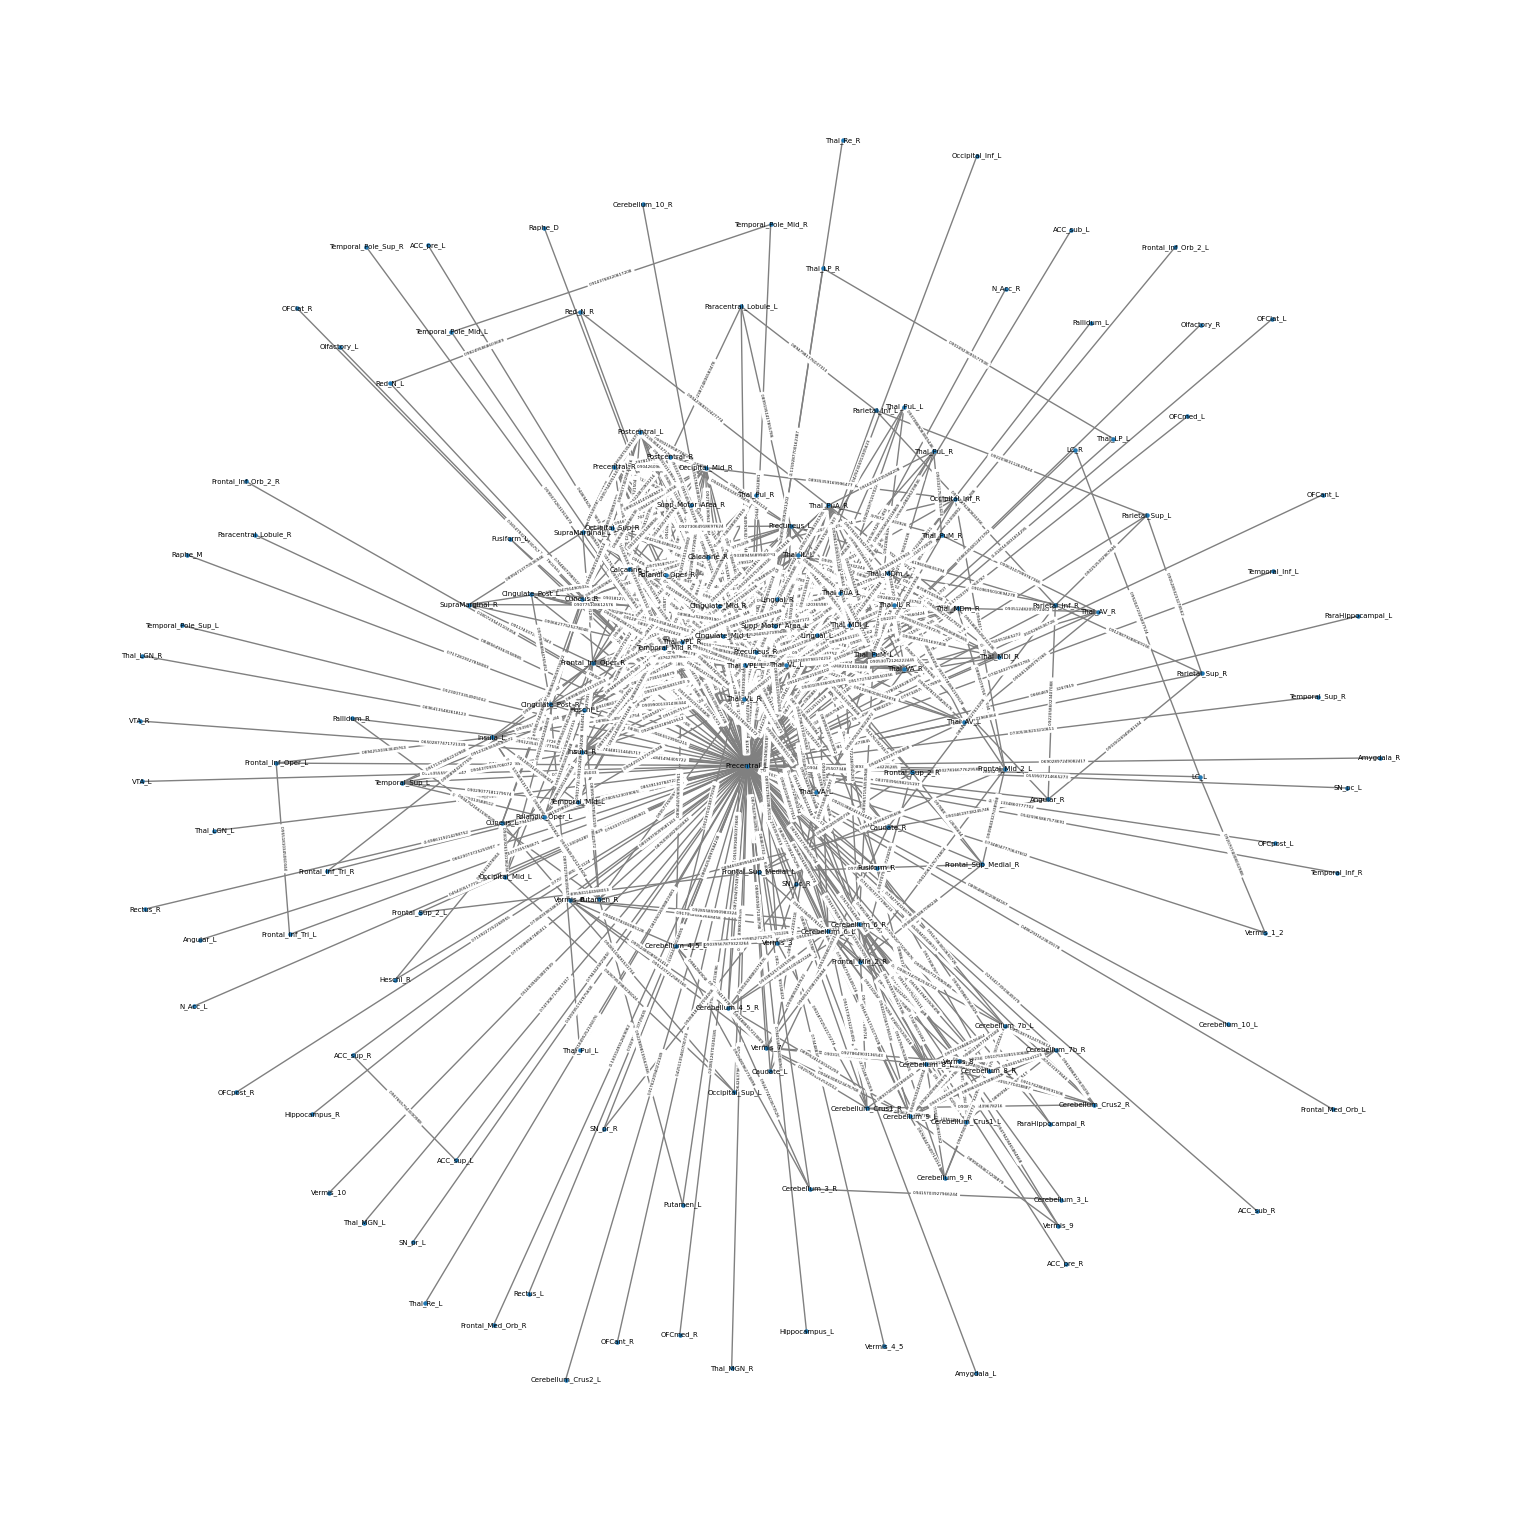

In [430]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(graph, weight='weight', k=0.5)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw(graph, pos, with_labels=True, node_size=5, edge_color="gray", font_size=5)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=3)
plt.show()

#### 3D визуализация на мозге:

1. Предобработка атласа AAL-3 (Automated Anatomical Labeling 3):

In [431]:
import nibabel as nib

aal3_img = nib.load("данные/AAL3/AAL3v1.nii.gz") 
aal3_data = aal3_img.get_fdata()

with open("данные/AAL3/AAL3v1.nii.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

aal3_dict = {}
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 3:
        region_id = int(parts[0])
        region_name = " ".join(parts[1:-1])
        aal3_dict[region_id] = region_name

print(list(aal3_dict.items())[:5])

[(1, 'Precentral_L'), (2, 'Precentral_R'), (3, 'Frontal_Sup_2_L'), (4, 'Frontal_Sup_2_R'), (5, 'Frontal_Mid_2_L')]


2. Вычистяем центроиды (средние координаты) регионов мозга

In [432]:
region_coordinates = {}
for region_id, region_name in aal3_dict.items():
    indices = np.argwhere(aal3_data == region_id)  # все воксели принадлежащие региону
    if len(indices) > 0:
        centroid = np.mean(indices, axis=0)  # усредняем (отдельно по каждой координате)
        region_coordinates[region_name] = centroid

df_coordinates = pd.DataFrame(region_coordinates).T
df_coordinates.columns = ["X", "Y", "Z"]

print(df_coordinates.head())

                         X          Y          Z
Precentral_L     64.465116  59.519285  60.820193
Precentral_R     24.449571  58.225081  61.404910
Frontal_Sup_2_L  55.083984  80.977618  53.618686
Frontal_Sup_2_R  33.724346  79.596371  54.671869
Frontal_Mid_2_L  62.763479  79.436432  50.968937


3. Связываем наши области с их координатами

In [433]:
filtered_coordinates = df_coordinates.loc[df_coordinates.index.intersection(brain_regions)]

print(filtered_coordinates)

                            X          Y          Z
Precentral_L        64.465116  59.519285  60.820193
Precentral_R        24.449571  58.225081  61.404910
Frontal_Sup_2_L     55.083984  80.977618  53.618686
Frontal_Sup_2_R     33.724346  79.596371  54.671869
Frontal_Mid_2_L     62.763479  79.436432  50.968937
Frontal_Mid_2_R     25.613169  79.441152  50.658230
Frontal_Inf_Oper_L  69.397881  68.745665  44.900771
Frontal_Inf_Oper_R  20.036455  69.837741  46.097927
Frontal_Inf_Tri_L   67.945038  77.333333  42.291420
...                       ...        ...        ...
SN_pc_R             40.424242  53.969697  28.818182
SN_pr_L             49.811321  55.471698  29.150943
SN_pr_R             39.533333  55.616667  29.000000
Red_N_L             47.175439  53.052632  30.719298
Red_N_R             42.034483  53.258621  30.672414
LC_L                47.000000  45.600000  23.000000
LC_R                42.000000  45.400000  22.000000
Raphe_D             44.611111  49.500000  30.777778
Raphe_M     

4. Визуализируем

In [465]:
import plotly.graph_objects as go

x_nodes = filtered_coordinates["X"].values
y_nodes = filtered_coordinates["Y"].values
z_nodes = filtered_coordinates["Z"].values
node_names = filtered_coordinates.index.tolist()

# Узлы
node_trace = go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers+text',  # Отображаем точки (узлы) + подписи к ним
    marker=dict(size=8, color='red'),
    text=node_names  # Текст - названия узлов
)

# Ребра
edge_traces = []
max_weight = max([abs(data["weight"]) for _, _, data in graph.edges(data=True)])
for u, v, data in graph.edges(data=True):
    x0, y0, z0 = filtered_coordinates.loc[u]
    x1, y1, z1 = filtered_coordinates.loc[v]
    
    weight = data["weight"]  # Получаем вес
    thickness = abs(weight) / max_weight * 3 + 1  # Нормируем, чтобы ребра были пропорциональны друг другу и масштабируем в диапазон [1, 5] 
    
    color = "blue" if weight < 0 else "rgb(153, 8, 8)"  # Цвет: синий для отрицательных, красный для положительных ребер

    edge_trace = go.Scatter3d(
        x=[x0, x1], y=[y0, y1], z=[z0, z1],
        mode='lines',
        line=dict(width=thickness, color=color),
        showlegend=False,
        opacity=0.8  # Применяем прозрачность
    )
    edge_traces.append(edge_trace)

# Создаём 3D-граф
fig = go.Figure(data=[node_trace] + edge_traces)
fig.update_layout(
    title="3D Brain Connectivity",
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False)
    ),
    width=1650,  # ширина графика
    height=1000,  # высота графика
)

# Открываем в браузере
fig.show(renderer="browser")


### На примере 1 респондента считаем кривизну Формана - Риччи

Для каждой вершины посчитаем дискретную кривизну Риччи

In [468]:
# Функция для вычисления кривизны Формана-Риччи для каждого ребра
def compute_forman_ricci_edges(G):
    ricci_curvatures = {}
    
    for u, v, data in G.edges(data=True):
        w_e = abs(data['weight'])
        w_u = len(list(G.neighbors(u)))
        w_v = len(list(G.neighbors(v)))

        sum_neighbors = 0.0
        for e in G.edges(u):
            if e != (u, v):
                sum_neighbors += G[u][e[1]]['weight']  / np.sqrt(w_e * abs(G[u][e[1]]['weight']))
        for e in G.edges(v):
            if e != (u, v):
                sum_neighbors += G[v][e[1]]['weight'] / np.sqrt(w_e * abs(G[v][e[1]]['weight']))

        ricci_curvature = w_e * (w_u / w_e + w_v / w_e - sum_neighbors)
        ricci_curvatures[(u, v)] = ricci_curvature

        if ricci_curvature==None:
            print(u, v, data, w_e, w_u, w_v, sum_neighbors)
    return ricci_curvatures

ricci_curvatures = compute_forman_ricci_edges(graph)
for (u, v), curvature in ricci_curvatures.items():
    graph[u][v]['ricci_curvature'] = curvature

print(ricci_curvatures)

{('Precentral_L', 'Precentral_R'): np.float64(39.50307578835988), ('Precentral_L', 'Frontal_Sup_2_L'): np.float64(48.60187840074776), ('Precentral_L', 'Frontal_Sup_2_R'): np.float64(42.30981444476723), ('Precentral_L', 'Frontal_Mid_2_L'): np.float64(43.2636521431212), ('Precentral_L', 'Frontal_Mid_2_R'): np.float64(47.801233454072644), ('Precentral_L', 'Frontal_Inf_Oper_L'): np.float64(52.382922755518834), ('Precentral_L', 'Frontal_Inf_Oper_R'): np.float64(43.507595482362234), ('Precentral_L', 'Frontal_Inf_Tri_L'): np.float64(54.00403976720698), ('Precentral_L', 'Frontal_Inf_Tri_R'): np.float64(49.80541081516674), ('Precentral_L', 'Frontal_Inf_Orb_2_L'): np.float64(103.38998922173371), ('Precentral_L', 'Frontal_Inf_Orb_2_R'): np.float64(110.51149708130377), ('Precentral_L', 'Rolandic_Oper_L'): np.float64(45.0145141253497), ('Precentral_L', 'Rolandic_Oper_R'): np.float64(45.91781295875167), ('Precentral_L', 'Supp_Motor_Area_L'): np.float64(40.69056010922066), ('Precentral_L', 'Supp_Moto

In [469]:
def compute_forman_ricci_nodes(G):
    """
    Вычисляет кривизну Формана-Риччи для каждой вершины как сумму кривизн её инцидентных рёбер.
    """
    ricci_edges = compute_forman_ricci_edges(G)  # Сначала считаем кривизну для рёбер
    ricci_nodes = {node: 0 for node in G.nodes()}  # Инициализируем словарь кривизн вершин

    # Складываем кривизны рёбер для каждой вершины
    for (u, v), ricci in ricci_edges.items():
        ricci_nodes[u] += ricci
        ricci_nodes[v] += ricci

    return ricci_nodes

ricci_nodes = compute_forman_ricci_nodes(graph)
nx.set_node_attributes(graph, ricci_nodes, "ricci_curvature")

print([(node, graph.nodes[node]['ricci_curvature']) for node in graph.nodes()])

[('Precentral_L', np.float64(9495.577932703767)), ('Precentral_R', np.float64(79.10099751414906)), ('Frontal_Sup_2_L', np.float64(50.37669307827588)), ('Frontal_Sup_2_R', np.float64(54.47255456655576)), ('Frontal_Mid_2_L', np.float64(59.10011082763829)), ('Frontal_Mid_2_R', np.float64(55.014799991610886)), ('Frontal_Inf_Oper_L', np.float64(56.22132518682475)), ('Frontal_Inf_Oper_R', np.float64(117.99212751604055)), ('Frontal_Inf_Tri_L', np.float64(55.43171963036782)), ('Frontal_Inf_Tri_R', np.float64(52.62718725177295)), ('Frontal_Inf_Orb_2_L', np.float64(103.38998922173371)), ('Frontal_Inf_Orb_2_R', np.float64(110.51149708130377)), ('Rolandic_Oper_L', np.float64(71.87990120647214)), ('Rolandic_Oper_R', np.float64(154.42175872505229)), ('Supp_Motor_Area_L', np.float64(112.69038114515429)), ('Supp_Motor_Area_R', np.float64(68.27677007293376)), ('Olfactory_L', np.float64(54.37025506620779)), ('Olfactory_R', np.float64(127.71222049900537)), ('Frontal_Sup_Medial_L', np.float64(56.497337719

In [470]:
sorted_nodes = sorted(graph.nodes())
ricci_vector = np.array([graph.nodes[node]['ricci_curvature'] for node in sorted_nodes])

print("Всего вершин:", len(sorted_nodes))
print("Отсортированные вершины:", sorted_nodes)
print("Вектор кривизн:", ricci_vector)

Всего вершин: 166
Отсортированные вершины: ['ACC_pre_L', 'ACC_pre_R', 'ACC_sub_L', 'ACC_sub_R', 'ACC_sup_L', 'ACC_sup_R', 'Amygdala_L', 'Amygdala_R', 'Angular_L', 'Angular_R', 'Calcarine_L', 'Calcarine_R', 'Caudate_L', 'Caudate_R', 'Cerebellum_10_L', 'Cerebellum_10_R', 'Cerebellum_3_L', 'Cerebellum_3_R', 'Cerebellum_4_5_L', 'Cerebellum_4_5_R', 'Cerebellum_6_L', 'Cerebellum_6_R', 'Cerebellum_7b_L', 'Cerebellum_7b_R', 'Cerebellum_8_L', 'Cerebellum_8_R', 'Cerebellum_9_L', 'Cerebellum_9_R', 'Cerebellum_Crus1_L', 'Cerebellum_Crus1_R', 'Cerebellum_Crus2_L', 'Cerebellum_Crus2_R', 'Cingulate_Mid_L', 'Cingulate_Mid_R', 'Cingulate_Post_L', 'Cingulate_Post_R', 'Cuneus_L', 'Cuneus_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Orb_2_L', 'Frontal_Inf_Orb_2_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Frontal_Mid_2_L', 'Frontal_Mid_2_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Fusiform_L', 'Fusif

### Создаем класс Person и систематизируем информацию по всем респондентам

In [ ]:
import scipy.spatial

from enum import Enum
from pathlib import Path
from scipy.spatial import distance

In [474]:
class Metric(Enum):
    MANHATTAN = "manhattan"
    EUCLIDEAN = "euclidean"
    COSINE = "cosine"
    CORRELATION = "correlation"
    CANBERRA = "canberra"
    MINKOWSKI = "minkowski"

В последствии в эту ячейку добавляются так же и другие методы и поля для работы с объектами

In [559]:
class Person:
    """
    Класс для хранения информации о человеке

    :param id: Уникальный идентификатор человека
    :param diagnoses: Список диагнозов (list)
    :param status: Статус (str, ill/healthy)
    :param data_file: Путь к файлу с объединённой информацией (CSV)
    :param corr_matrix_file: Путь к файлу с матрицей корреляций (CSV)
    :param graph: Граф корреляций (объект networkx.Graph)
    :param forman_ricci_vector: Вектор значений кривизны (объект np.array)
    :param cluster_kmeans: Метка кластера для K-Means
    :param cluster_hdbscan: Метка кластера для HDBSCAN
    :param cluster_kmedoids: Метка кластера для K-Medoids
    """
    def __init__(self, person_id, data_file, corr_matrix_file, diagnoses):
        self.id = person_id

        # Индивидуальные файлы
        self.data_file = data_file
        self.corr_matrix_file = corr_matrix_file

        # Диагнозы
        self.diagnoses = diagnoses
        self.status = self.determine_status()
        
        # Кривизны
        self.curvature_types = ["forman_ricci"]

        self.graph = None
        self.ricci_vectors = None
        self.cluster_kmeans = None
        self.clustering_results = {}

    def determine_status(self):
        if len(self.diagnoses) == 1 and self.diagnoses[0] == 'NORMCOG':
            return 'healthy'
        else:
            return 'ill'
        
    def build_graph(self, density_target=0.05):
        df_corr = pd.read_csv(self.corr_matrix_file, index_col=0)
        N = df_corr.shape[0]
        node_labels = list(df_corr.index)

        G = nx.Graph()

        # Создаем полный взвешенный граф
        for i, node1 in enumerate(node_labels):
            for j, node2 in enumerate(node_labels[i + 1:]):
                G.add_edge(node1, node2, weight=df_corr.at[node1, node2])

        # Строим МАКСИМАЛЬНОЕ остовное дерево (MST)
        mst_edges = list(nx.minimum_spanning_edges(
            G, 
            algorithm="kruskal", 
            weight=lambda u, v, data: -abs(data['weight']),  # Инверсия для максимизации, учитывается абсолютный вес ребер
            data=True
        ))

        # Добавляем ребра дерева в список ребер для финального графа
        final_edges = [(u, v, data['weight']) for u, v, data in mst_edges]
 
        max_edges_count = N * (N - 1) / 2  # Максимальное возможное число ребер в графе
        edges_count_target = int(density_target * max_edges_count)  # Умножая на density_target получаем необходимое количество ребер

        # Чтобы дополнить граф сортируем ребра и добавляем до целевого количества
        sorted_edges = sorted(
            G.edges(data=True), 
            key=lambda x: abs(x[2]['weight']),  # Сортировка по убыванию веса
            reverse=True
        )
        mst_edge_set = {(u, v) for u, v, _ in mst_edges}
        for u, v, data in sorted_edges:
            if len(final_edges) >= edges_count_target:
                break
            if (u, v) not in mst_edge_set:
                final_edges.append((u, v, data['weight']))

        G_final = nx.Graph()
        G_final.add_weighted_edges_from(final_edges)

        self.graph = G_final

    def __compute_forman_ricci_edges(self, G):
        forman_ricci_curvatures = {}
        
        for u, v, data in G.edges(data=True):
            w_e = data['weight']
            w_u = len(list(G.neighbors(u)))
            w_v = len(list(G.neighbors(v)))

            sum_neighbors = 0.0
            for neighbor in G.neighbors(u):
                if neighbor != v:
                    sum_neighbors += G[u][neighbor]['weight'] / np.sqrt(abs(w_e * G[u][neighbor]['weight']))
            for neighbor in G.neighbors(v):
                if neighbor != u:
                    sum_neighbors += G[v][neighbor]['weight'] 

            forman_ricci_curvatures[(u, v)] = w_e * (w_u / w_e + w_v / w_e - sum_neighbors)
        
        return forman_ricci_curvatures

    def _compute_forman_ricci_nodes(self, G):
        forman_ricci_edges = self.__compute_forman_ricci_edges(G)
        forman_ricci_nodes = {node: 0 for node in G.nodes()}

        for (u, v), ricci in forman_ricci_edges.items():
            forman_ricci_nodes[u] += ricci
            forman_ricci_nodes[v] += ricci

        return forman_ricci_nodes

    def comput_curvatures(self):
        if not self.graph:
            print("Расчет кривизн возможен только после создания графа")
            return

        for curvature_type in self.curvature_types:
            curvature_nodes = getattr(self, f"_compute_{curvature_type}_nodes")(self.graph)
            nx.set_node_attributes(self.graph, curvature_nodes, curvature_type)

    def comput_ricci_vectors(self):
        sorted_nodes = sorted(self.graph.nodes())
        ricci_vectors = {}
        for curvature_type in self.curvature_types: 
            ricci_vectors[curvature_type] = np.array([self.graph.nodes[node][curvature_type] for node in sorted_nodes])

        self.ricci_vectors = ricci_vectors
 
    def distance_to(self, other, curvature="forman_ricci", metric=Metric.MANHATTAN):
        """
        Вычисляет расстояние между векторами кривизн двух людей.

        :param other: Другой объект Person
        :param metric: Метрика расстояния
        :return: Число (расстояние)
        """
        if curvature == "forman_ricci":
            x, y = self.forman_ricci_vector, other.forman_ricci_vector
        
        if metric == "manhattan":
            # Манхэттенское расстояние (L1-норма)
            return distance.cityblock(x, y)
        if metric == "euclidean":
            # Евклидово расстояние (L2-норма)
            return distance.euclidean(x, y)
        elif metric == "cosine":
            # Косинусное расстояние
            return distance.cosine(x, y)
        elif metric == "correlation":
            # Корреляционное расстояние (1 - коэффициент Пирсона)
            return 1 - np.corrcoef(x, y)[0, 1]
        elif metric == "canberra":
            # Варьированное расстояние (Canberra)
            return distance.canberra(x, y)
        elif metric == "minkowski":
            # Вессерово расстояние (обобщение L1 и L2, здесь p=3)
            return distance.minkowski(x, y, p=3)
        else:
            raise ValueError(f"Метрика {metric} не существует. Выберите одну из: {', '.join([m.value for m in Metric])}")

    def __repr__(self):
        return f"Subject: id={self.id}, status={self.status}, nodes={len(self.graph.nodes)}, edges={len(self.graph.edges)}"


Преподготовка для добавления к данным людей их диагнозов

In [560]:
import openpyxl

df_diagnoses = pd.read_excel('данные/diagnosis_filtered_v3.xlsx')

diagnoses_dict = {}
for _, row in df_diagnoses.iterrows():
    person_id = row['OASISID']
    diagnoses = []
    if row['NORMCOG'] == 1:
        diagnoses.append('NORMCOG') 
    if row['DEMENTED'] == 1:
        diagnoses.append('DEMENTED')
    if row['MCIAMEM-IMPNOMCI'] == 1:
        diagnoses.append('MCIAMEM-IMPNOMCI')
    if row['PROBAD-POSSADIF'] == 1:
        diagnoses.append('PROBAD-POSSADIF')
    diagnoses_dict[person_id] = diagnoses

Теперь создадим список объектов "людей", где для каждого пациента будут систематизированы его данные

In [563]:
def create_person_list(data_dir, diagnoses_dict):
    persons = []
    healthy, ill = 0, 0

    incorrect_matrix_people = []
    incorrect_matrix_count = 0
    
    empty_diagnoses_people = []
    empty_diagnoses_count = 0

    for idx, person_folder in enumerate(sorted(data_dir.iterdir())):
        corr_matrix_file = person_folder / "correlation_matrix.csv"
        full_data_file = person_folder / "full_data.csv"

        if corr_matrix_file.exists() and full_data_file.exists():
            df_full = pd.read_csv(full_data_file, header=None)

            # Для дальнейшей работы удобно взять в качестве id пациентов уникальное название их папки
            person_id = person_folder.name.lstrip("sub-")

            # Для некоторых пользователей матрица корреляции строится неправильно: 
            # данные частично отсутствуют, и матрица получается близкой к 0. 
            # Таких пациентов мы добавляем в блэклист
            if df_full.shape[0] > 1 and pd.isna(df_full.iloc[1, 0]) or str(df_full.iloc[1, 0]).strip() in {"0", "0.0"}:
                incorrect_matrix_count += 1
                incorrect_matrix_people.append((idx, person_id))
                continue

            # Извлечем для каждого пользователя его диагнозы 
            diagnoses = diagnoses_dict.get(person_id, [])

            # Если диагноза не найдено, значит от был некорректно определен
            # Пользователи без корректно определенных диагнозов не представляют интереса в данной работе
            if diagnoses == []:
                empty_diagnoses_count += 1
                empty_diagnoses_people.append((idx, person_folder))
                continue

            # Только если все данные человека корректны, создаем объект
            new_person = Person(
                person_id=person_id,
                data_file=str(full_data_file),
                corr_matrix_file=str(corr_matrix_file),
                diagnoses=diagnoses
            )

            # Теперь обсчитаем его
            new_person.build_graph()
            new_person.comput_curvatures()
            new_person.comput_ricci_vectors()

            if new_person.status == 'healthy':
                healthy += 1
            else:
                ill += 1 

            persons.append(new_person)

        else:
            print(f"Для человека {person_folder} не существует одного из необходимых файлов")  

    return persons, incorrect_matrix_people, incorrect_matrix_count, empty_diagnoses_people, empty_diagnoses_count, healthy, ill

In [564]:
data_dir = Path("данные/TimeCourses")
persons, incorrect_matrix_people, incorrect_matrix_count, empty_diagnoses_people, empty_diagnoses_count, healthy, ill = create_person_list(data_dir, diagnoses_dict)

print(f"Создано {len(persons)} объектов Person. Из них {healthy} здоровых и {ill} больных")
for p in persons[:10]:
    print(p)
print()
print(f"Количество людей с некорректной матрицей корреляции: {incorrect_matrix_count}")
print("Их индексы:")
[print(pers) for pers in incorrect_matrix_people]
print()
print(f"Количество людей без диагнозов: {empty_diagnoses_count}")
print("Их индексы:")
[print(pers) for pers in empty_diagnoses_people]

Создано 377 объектов Person. Из них 293 здоровых и 84 больных
Subject: id=OAS30001, status=healthy, nodes=166, edges=684
Subject: id=OAS30003, status=healthy, nodes=166, edges=684
Subject: id=OAS30005, status=healthy, nodes=166, edges=684
Subject: id=OAS30006, status=healthy, nodes=166, edges=684
Subject: id=OAS30007, status=healthy, nodes=166, edges=684
Subject: id=OAS30009, status=healthy, nodes=166, edges=684
Subject: id=OAS30011, status=healthy, nodes=166, edges=684
Subject: id=OAS30013, status=healthy, nodes=166, edges=684
Subject: id=OAS30015, status=healthy, nodes=166, edges=684
Subject: id=OAS30018, status=healthy, nodes=166, edges=684

Количество людей с некорректной матрицей корреляции: 6
Их индексы:
(19, 'OAS30033')
(95, 'OAS30205')
(195, 'OAS30370')
(254, 'OAS30477')
(330, 'OAS30618')
(382, 'OAS30722')

Количество людей без диагнозов: 21
Их индексы:
(1, PosixPath('данные/TimeCourses/sub-OAS30002'))
(3, PosixPath('данные/TimeCourses/sub-OAS30004'))
(11, PosixPath('данные/Tim

### Метрики

Мы разобрались с "объектами" людей и с векторами кривизн, теперь разберемся с метриками. 

Во-первых, я добавила новый метод обсчета расстояний между векторами в зависимости от выбранной метрики в класс Person

Теперь для каждой метрики нужно рассчитать матрицу расстояний (по всем людям). Позже мы добавим и другие кривизны, поэтому матриц будет еще больше. Для этого создадим структуру для хранения всех этих матриц

In [326]:
distance_matrices = {
    # ('forman-ricci', Metric.EUCLIDEAN): np.array(...),  # Матрица для кривизны "forman-ricci" и метрики "euclidean"
    # ('forman-ricci', Metric.MANHATTAN): np.array(...),  # Матрица для кривизны "forman-ricci" и метрики "manhattan"
    # ('olivie-ricci', Metric.EUCLIDEAN): np.array(...),  # Матрица для другой кривизны и метрики "euclidean"
    # ...
}

In [327]:
def compute_distance_matrices(persons, curvatures, metrics):
    distance_matrices = {}

    for curvature in curvatures:
        for metric in metrics:
            N = len(persons)
            distance_matrix = np.zeros((N, N))
            for i in range(N):
                for j in range(i + 1, N):
                    dist = persons[i].distance_to(persons[j], curvature=curvature, metric=metric)
                    distance_matrix[i, j] = dist
                    distance_matrix[j, i] = dist 

            distance_matrices[(curvature, metric)] = distance_matrix

    return distance_matrices

In [328]:
curvatures = ['forman_ricci']
metrics = ["manhattan", "euclidean", "cosine", "correlation", "canberra"]
distance_matrices = compute_distance_matrices(persons, curvatures, metrics)

Визуализируем полученные данные

In [329]:
person_labels = [person.id for person in persons]  # Или другой удобный идентификатор

# for (curvature, metric), matrix in distance_matrices.items():
#     df = pd.DataFrame(matrix, index=person_labels, columns=person_labels)

#     plt.figure(figsize=(180, 180))
#     sns.heatmap(df, cmap="coolwarm", linewidths=0.5)
#     plt.title(f"Матрица расстояний ({curvature}, {metric})", fontsize=14, pad=20)
#     plt.xlabel("Person")
#     plt.ylabel("Person")
#     plt.show()

### Кластеризация

In [357]:
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=80)

#### K-means

In [358]:
from sklearn.cluster import KMeans

def cluster_kmeans(persons, n_clusters=2, curvature="forman_ricci"):

    vectors = np.array([getattr(p, f"{curvature}_vector") for p in persons])

    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(vectors)

    for person, label in zip(persons, labels):
        person.clustering_results[(curvature, None, 'kmeans')] = label

    return labels

labels_kmeans = cluster_kmeans(persons, n_clusters=2)
print(labels_kmeans)

[1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0
 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1]


#### K-Medoids

In [359]:
from sklearn_extra.cluster import KMedoids

def cluster_kmedoids(persons, distance_matrices, 
                     curvature="forman_ricci", metric=Metric.MANHATTAN, n_clusters=2):

    model = KMedoids(n_clusters=n_clusters, metric="precomputed", random_state=42)
    labels = model.fit_predict(distance_matrices.get((curvature, metric.value)))

    for person, label in zip(persons, labels):
        person.clustering_results[(curvature, metric.value, 'kmedoids')] = label

    return labels

labels_kmedoids = cluster_kmedoids(persons, distance_matrices)
print(labels_kmedoids)

[1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0
 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1
 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 1 0 0 1 1 1 0]


#### HDBSCAN

In [360]:
import hdbscan

def cluster_hdbscan(persons, distance_matrices, 
                     curvature="forman_ricci", metric=Metric.MANHATTAN, min_cluster_size=3):
    
    model = hdbscan.HDBSCAN(metric="precomputed", min_cluster_size=min_cluster_size)
    labels = model.fit_predict(distance_matrices.get((curvature, metric.value)))

    for person, label in zip(persons, labels):
        person.clustering_results[(curvature, metric.value, 'hdbscan')] = label

    return labels

labels_hdbscan = cluster_hdbscan(persons, distance_matrices)
print(labels_hdbscan)

[ 0 -1 -1 -1  0  0 -1 -1 -1  0  0  0 -1  0  0  0  0  0  0 -1 -1  0  0 -1  0  0
 -1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1  0 -1 -1 -1  0 -1  0 -1  0
 -1  0  0  0  0  0  0 -1  0  0 -1 -1  0 -1  0 -1 -1 -1  0 -1 -1  0  0 -1  0 -1
  0 -1 -1 -1  0  0  0  1  1  0  0 -1 -1  0  0  0 -1 -1  0  0 -1  0  0  0  0 -1
  0  0 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  0  0 -1 -1  0  0  0  0  0 -1  0 -1  0
 -1 -1 -1 -1 -1  0  0 -1  0  0  0 -1  0  0 -1  0 -1 -1  0 -1  0  0  0 -1  0 -1
  0  0 -1  0 -1  0  0  0 -1 -1  1 -1 -1  0 -1  0 -1 -1  0  0 -1  0  0  0 -1 -1
 -1 -1  1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0  0  0  0  0  0 -1  0 -1  0  0  0  0
  0 -1 -1  0  0  0 -1  0  0 -1 -1  0 -1  0 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0  0
  0 -1 -1  0  0 -1  0 -1 -1  0  0  0  0 -1 -1  0 -1  0  0  0 -1  0 -1 -1 -1  0
  0  0 -1  0 -1  0 -1 -1 -1  0  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1  0  0  0  0
 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1  0 -1  0  0  0 -1 -1
 -1 -1 -1 -1 -1  0  0  0  0  0  0  0 -1 -1 -1 -1  0 

#### Объединим все методы кластеризации в одну функцию

In [390]:
def cluster_data(persons, distance_matrices, method="kmeans", 
                 n_clusters=2, curvature="forman_ricci", metric=Metric.MANHATTAN, 
                 min_cluster_size=3):
    """
    Кластеризация данных по выбранному методу.
    
    :param persons: список объектов Person
    :param distance_matrices: матрицы попарных расстояний
    :param method: метод кластеризации ('kmeans', 'kmedoids', 'hdbscan')
    :param n_clusters: число кластеров (для KMeans и KMedoids)
    :param curvature: тип кривизны для векторизации
    :param metric: метрика расстояния (например, Metric.MANHATTAN)
    :param min_cluster_size: минимальный размер кластера (для HDBSCAN)
    :return: список меток кластеров
    """
    if method == "kmeans":
        vectors = np.array([p.ricci_vectors[curvature] for p in persons])
        model = KMeans(n_clusters=n_clusters, random_state=42)
        labels = model.fit_predict(vectors)

    elif method == "kmedoids":
        model = KMedoids(n_clusters=n_clusters, metric="precomputed", random_state=42)
        labels = model.fit_predict(distance_matrices.get((curvature, metric.value)))

    elif method == "hdbscan":
        model = hdbscan.HDBSCAN(metric="precomputed", min_cluster_size=min_cluster_size)
        labels = model.fit_predict(distance_matrices.get((curvature, metric.value)))
    
    else:
        raise ValueError("Неподдерживаемый метод кластеризации. Выберите один из этих: 'kmeans', 'kmedoids', 'hdbscan'.")

    for person, label in zip(persons, labels):
        person.clustering_results[(curvature, metric.value, method)] = label

    return labels

Оценка результатов

In [391]:
from sklearn.metrics import confusion_matrix

def evaluate_clustering(persons, clustering_method, curvature="forman_ricci", metric=Metric.MANHATTAN, clustering_level='simple'):
    if clustering_level=='simple':
        true_labels = np.array([1 if p.status == "ill" else 0 for p in persons])
    else:
        pass # здесь будет рассмотрен случай кластеризации по конкретным диагнозам

    if clustering_method=='kmeans':
        predicted_labels = np.array([p.clustering_results[(curvature, metric.value, "kmeans")] for p in persons])
    elif clustering_method=='kmedoids':
        predicted_labels = np.array([p.clustering_results[(curvature, metric.value, "kmedoids")] for p in persons])
    else:
        predicted_labels = np.array([p.clustering_results[(curvature, metric.value, "hdbscan")] for p in persons])  

    cm = confusion_matrix(true_labels, predicted_labels)
    
    print("Матрица ошибок:")
    print(cm)
    print("=" * 50)

Теперь посмотрим, что у нас вырисовывается

In [392]:
curvatures = ["forman_ricci"]

def error_matrix_output(persons, curvatures, 
                        metrics=list(Metric)[:-1], clustering_methods = ["kmeans", "kmedoids", "hdbscan"]):
    for method in clustering_methods:
        for curvature in curvatures:
            metrics_list = [Metric.EUCLIDEAN] if method == "kmeans" else metrics  # в KMeans по умолчанию используется Евклидова метрика, и ее нельзя поменять

            for metric in metrics_list:
                cluster_data(persons, distance_matrices, method=method, curvature=curvature, metric=metric)
                print(f"Оценка для {method}, метрика {metric.value}, кривизна {curvature}")
                evaluate_clustering(persons, method, curvature=curvature, metric=metric)
error_matrix_output(persons, curvatures)

Оценка для kmeans, метрика euclidean, кривизна forman_ricci
Матрица ошибок:
[[111 215]
 [ 13  59]]
Оценка для kmedoids, метрика manhattan, кривизна forman_ricci
Матрица ошибок:
[[188 138]
 [ 39  33]]
Оценка для kmedoids, метрика euclidean, кривизна forman_ricci
Матрица ошибок:
[[169 157]
 [ 34  38]]
Оценка для kmedoids, метрика cosine, кривизна forman_ricci
Матрица ошибок:
[[173 153]
 [ 38  34]]
Оценка для kmedoids, метрика correlation, кривизна forman_ricci
Матрица ошибок:
[[160 166]
 [ 42  30]]
Оценка для kmedoids, метрика canberra, кривизна forman_ricci
Матрица ошибок:
[[169 157]
 [ 38  34]]
Оценка для hdbscan, метрика manhattan, кривизна forman_ricci
Матрица ошибок:
[[  0   0   0]
 [161 162   3]
 [ 27  44   1]]
Оценка для hdbscan, метрика euclidean, кривизна forman_ricci
Матрица ошибок:
[[  0   0   0   0   0]
 [ 49   3   4 265   5]
 [  8   0   0  64   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
Оценка для hdbscan, метрика cosine, кривизна forman_ricci
Матрица ошибок:
[[  0   

Итак, мы поняли, что только по кривизне риччи ничего нельзя выяснить

Попробуем добавить другие варианты кривизн

### Кривизны Оливье-Риччи, AFR, Лина-Лу-Яу

#### Оливье

In [393]:
from scipy.stats import wasserstein_distance
import networkx as nx

def get_random_walk_measure(G, node, alpha=0.5):
    node_index_map = {n: i for i, n in enumerate(G.nodes())}

    neighbors = list(G.neighbors(node))
    deg = len(neighbors)
    m_x = np.zeros(len(G.nodes()))
    
    m_x[node_index_map[node]] = alpha
    
    if deg > 0:
        for neighbor in neighbors:
            m_x[node_index_map[neighbor]] = (1 - alpha) / deg
    
    return m_x

def compute_ollivier_ricci_edges(G):
    ollivier_ricci_curvatures = {}
    
    for u, v, data in G.edges(data=True):
        w_uv = data.get('weight')
        m_u = get_random_walk_measure(G, u)
        m_v = get_random_walk_measure(G, v)
        
        W1 = wasserstein_distance(m_u, m_v)
        ollivier_ricci_curvatures[(u, v)] = 1 - W1 / w_uv
    
    return ollivier_ricci_curvatures

def compute_ollivier_ricci_nodes(G):
    ollivier_ricci_edges = compute_ollivier_ricci_edges(G)
    ollivier_ricci_nodes = {node: 0 for node in G.nodes()}
    
    for (u, v), ricci in ollivier_ricci_edges.items():
        ollivier_ricci_nodes[u] += ricci
        ollivier_ricci_nodes[v] += ricci
    
    return ricci_nodes

def compute_ollivier_ricci_vector(G):
    sorted_nodes = sorted(G.nodes())
    return np.array([G.nodes[node]['ollivier_ricci_curvature'] for node in sorted_nodes])



In [394]:
pers = persons[0]   

# Проверим как работает алгоритм на ребрах
ollivier_ricci_curvatures = compute_ollivier_ricci_edges(pers.graph)
for (u, v), curvature in ollivier_ricci_curvatures.items():
    pers.graph[u][v]['ollivier_ricci_curvature'] = curvature

print("Кривизна Олливье-Риччи для ребер:")
print(ollivier_ricci_curvatures)

Кривизна Олливье-Риччи для ребер:
{('Precentral_L', 'Precentral_R'): np.float64(0.9941189039613696), ('Precentral_L', 'Frontal_Sup_2_L'): np.float64(0.9926620742983069), ('Precentral_L', 'Frontal_Sup_2_R'): np.float64(0.9936244646179451), ('Precentral_L', 'Frontal_Mid_2_L'): np.float64(0.9935838386844131), ('Precentral_L', 'Frontal_Mid_2_R'): np.float64(0.9929347731946447), ('Precentral_L', 'Frontal_Inf_Oper_L'): np.float64(0.9921900883425133), ('Precentral_L', 'Frontal_Inf_Oper_R'): np.float64(0.9939411748758624), ('Precentral_L', 'Frontal_Inf_Tri_L'): np.float64(0.9919398985521354), ('Precentral_L', 'Frontal_Inf_Tri_R'): np.float64(0.992509929231093), ('Precentral_L', 'Frontal_Inf_Orb_2_L'): np.float64(0.973977109056654), ('Precentral_L', 'Frontal_Inf_Orb_2_R'): np.float64(0.9668688063136148), ('Precentral_L', 'Rolandic_Oper_L'): np.float64(0.9934705953375266), ('Precentral_L', 'Rolandic_Oper_R'): np.float64(0.9941502097651695), ('Precentral_L', 'Supp_Motor_Area_L'): np.float64(0.994

In [379]:
# Проверим на вершинах
ollivier_ricci_nodes = compute_ollivier_ricci_nodes(pers.graph)
nx.set_node_attributes(pers.graph, ollivier_ricci_nodes, "ollivier_ricci_curvature")

print("Кривизна Олливье-Риччи для вершин:")
print([(node, pers.graph.nodes[node]['ollivier_ricci_curvature']) for node in pers.graph.nodes()])

Кривизна Олливье-Риччи для вершин:
[('Precentral_L', np.float64(166.41287005649372)), ('Precentral_R', np.float64(100.07328052086446)), ('Frontal_Sup_2_L', np.float64(24.870315322155285)), ('Frontal_Sup_2_R', np.float64(82.70351695552776)), ('Frontal_Mid_2_L', np.float64(83.83952504097294)), ('Frontal_Mid_2_R', np.float64(24.842861756517493)), ('Frontal_Inf_Oper_L', np.float64(19.50371682599345)), ('Frontal_Inf_Oper_R', np.float64(124.21235195378569)), ('Frontal_Inf_Tri_L', np.float64(16.90552152157684)), ('Frontal_Inf_Tri_R', np.float64(25.480402433275874)), ('Frontal_Inf_Orb_2_L', np.float64(158.67003586643733)), ('Frontal_Inf_Orb_2_R', np.float64(97.68173597352005)), ('Rolandic_Oper_L', np.float64(54.97804526775836)), ('Rolandic_Oper_R', np.float64(184.028940150129)), ('Supp_Motor_Area_L', np.float64(114.37920186827121)), ('Supp_Motor_Area_R', np.float64(77.2600663267642)), ('Olfactory_L', np.float64(32.53055292730704)), ('Olfactory_R', np.float64(214.76848317828276)), ('Frontal_Sup

In [380]:
# Вычисляем вектор кривизны Олливье-Риччи
ollivier_ricci_vector = compute_ollivier_ricci_vector(pers.graph)
sorted_nodes = sorted(pers.graph.nodes())

print("Всего вершин:", len(sorted_nodes))
print("Отсортированные вершины:", sorted_nodes)
print("Вектор кривизн Олливье-Риччи:", ollivier_ricci_vector)

Всего вершин: 166
Отсортированные вершины: ['ACC_pre_L', 'ACC_pre_R', 'ACC_sub_L', 'ACC_sub_R', 'ACC_sup_L', 'ACC_sup_R', 'Amygdala_L', 'Amygdala_R', 'Angular_L', 'Angular_R', 'Calcarine_L', 'Calcarine_R', 'Caudate_L', 'Caudate_R', 'Cerebellum_10_L', 'Cerebellum_10_R', 'Cerebellum_3_L', 'Cerebellum_3_R', 'Cerebellum_4_5_L', 'Cerebellum_4_5_R', 'Cerebellum_6_L', 'Cerebellum_6_R', 'Cerebellum_7b_L', 'Cerebellum_7b_R', 'Cerebellum_8_L', 'Cerebellum_8_R', 'Cerebellum_9_L', 'Cerebellum_9_R', 'Cerebellum_Crus1_L', 'Cerebellum_Crus1_R', 'Cerebellum_Crus2_L', 'Cerebellum_Crus2_R', 'Cingulate_Mid_L', 'Cingulate_Mid_R', 'Cingulate_Post_L', 'Cingulate_Post_R', 'Cuneus_L', 'Cuneus_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Orb_2_L', 'Frontal_Inf_Orb_2_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Frontal_Mid_2_L', 'Frontal_Mid_2_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Fusiform_L', 'Fusif

#### Добавляем Оливье в класс:

In [404]:
class Person:
    """
    Класс для хранения информации о человеке

    :param id: Уникальный идентификатор человека
    :param diagnoses: Список диагнозов (list)
    :param status: Статус (str, ill/healthy)
    :param data_file: Путь к файлу с объединённой информацией (CSV)
    :param corr_matrix_file: Путь к файлу с матрицей корреляций (CSV)
    :param graph: Граф корреляций (объект networkx.Graph)
    :param forman_ricci_vector: Вектор значений кривизны (объект np.array)
    :param cluster_kmeans: Метка кластера для K-Means
    :param cluster_hdbscan: Метка кластера для HDBSCAN
    :param cluster_kmedoids: Метка кластера для K-Medoids
    """
    def __init__(self, person_id, data_file, corr_matrix_file, diagnoses):
        self.id = person_id
        self.diagnoses = diagnoses
        self.status = self.determine_status(diagnoses)
        self.data_file = data_file
        self.corr_matrix_file = corr_matrix_file
        self.graph = self.build_graph(self.corr_matrix_file)
        self.ricci_vectors = {
            "forman_ricci": self.compute_forman_ricci_vector(),
            "ollivier_ricci": self.compute_ollivier_ricci_vector()
        }
        self.cluster_kmeans = None
        self.clustering_results = {}

    def determine_status(self, diagnoses):
        if len(diagnoses) > 0:
            return 'ill' 
        else:
            return 'healthy'

    def __compute_forman_ricci_edges(self, G):
        forman_ricci_curvatures = {}
        
        for u, v, data in G.edges(data=True):
            w_e = data['weight']
            w_u = len(list(G.neighbors(u)))
            w_v = len(list(G.neighbors(v)))

            sum_neighbors = 0.0
            for neighbor in G.neighbors(u):
                if neighbor != v:
                    sum_neighbors += G[u][neighbor]['weight'] / np.sqrt(abs(w_e * G[u][neighbor]['weight']))
            for neighbor in G.neighbors(v):
                if neighbor != u:
                    sum_neighbors += G[v][neighbor]['weight'] 

            forman_ricci_curvatures[(u, v)] = w_e * (w_u / w_e + w_v / w_e - sum_neighbors)
        
        return forman_ricci_curvatures

    def __compute_forman_ricci_nodes(self, G):
        forman_ricci_edges = self.__compute_forman_ricci_edges(G)
        forman_ricci_nodes = {node: 0 for node in G.nodes()}

        for (u, v), ricci in forman_ricci_edges.items():
            forman_ricci_nodes[u] += ricci
            forman_ricci_nodes[v] += ricci

        return forman_ricci_nodes

    def __get_random_walk_measure(self, G, node, alpha=0.5):
        node_index_map = {n: i for i, n in enumerate(G.nodes())}

        neighbors = list(G.neighbors(node))
        deg = len(neighbors)
        m_x = np.zeros(len(G.nodes()))
        
        m_x[node_index_map[node]] = alpha
        
        if deg > 0:
            for neighbor in neighbors:
                m_x[node_index_map[neighbor]] = (1 - alpha) / deg

        return m_x
    
    def __compute_ollivier_ricci_edges(self, G):
        """
        Вычисление кривизны Олливье-Риччи для рёбер графа G.
        """
        ollivier_ricci_curvatures = {}
    
        for u, v, data in G.edges(data=True):
            w_uv = data.get('weight')
            m_u = self.__get_random_walk_measure(G, u)
            m_v = self.__get_random_walk_measure(G, v)
            
            W1 = wasserstein_distance(m_u, m_v)
            ollivier_ricci_curvatures[(u, v)] = 1 - W1 / w_uv
        
        return ollivier_ricci_curvatures
    
    def __compute_ollivier_ricci_nodes(self, G):
        """
        Вычисление кривизны Олливье-Риччи для узлов графа G.
        """
        ollivier_ricci_edges = self.__compute_ollivier_ricci_edges(G)
        ollivier_ricci_nodes = {node: 0 for node in G.nodes()}
        
        for (u, v), ricci in ollivier_ricci_edges.items():
            ollivier_ricci_nodes[u] += ricci
            ollivier_ricci_nodes[v] += ricci
        
        return ricci_nodes

    def build_graph(self, corr_matrix_file, density_target=0.05):
        df_corr = pd.read_csv(corr_matrix_file, index_col=0)
        N = df_corr.shape[0]
        node_labels = list(df_corr.index)

        G = nx.Graph()

        for i in range(N):
            for j in range(i + 1, N):
                w = df_corr.iloc[i, j]
                G.add_edge(node_labels[i], node_labels[j], weight=abs(w), original_weight=w)

        mst_edges = list(nx.minimum_spanning_edges(G, algorithm="kruskal", weight=lambda u, v, d: d['weight'], data=True))

        E_max = int(density_target * N * (N - 1) / 2)
        sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
        final_edges = [(u, v, data['original_weight']) for u, v, data in mst_edges]

        for u, v, data in sorted_edges:
            if len(final_edges) >= E_max:
                break
            final_edges.append((u, v, data['original_weight']))

        G_final = nx.Graph()
        G_final.add_weighted_edges_from(final_edges)

        # ADD FORMAN-RICCI CURVATURE
        forman_ricci_curvatures = self.__compute_forman_ricci_edges(G_final)
        for (u, v), curvature in forman_ricci_curvatures.items():
            G_final[u][v]['forman_ricci_curvature'] = curvature
        forman_ricci_nodes = self.__compute_forman_ricci_nodes(G_final)
        nx.set_node_attributes(G_final, forman_ricci_nodes, "forman_ricci_curvature")

        # ADD OLLIVIER-RICCI CURVATURE
        ollivier_ricci_curvatures = self.__compute_ollivier_ricci_edges(G_final)
        for (u, v), curvature in ollivier_ricci_curvatures.items():
            G_final[u][v]['ollivier_ricci_curvature'] = curvature
        ollivier_ricci_nodes = self.__compute_ollivier_ricci_nodes(G_final)
        nx.set_node_attributes(G_final, ollivier_ricci_nodes, "ollivier_ricci_curvature")

        return G_final

    def compute_forman_ricci_vector(self):
        sorted_nodes = sorted(self.graph.nodes())
        return np.array([self.graph.nodes[node]['forman_ricci_curvature'] for node in sorted_nodes])
 
    def compute_ollivier_ricci_vector(self):
        sorted_nodes = sorted(self.graph.nodes())
        return np.array([self.graph.nodes[node]['ollivier_ricci_curvature'] for node in sorted_nodes])

    def distance_to(self, other, curvature="forman_ricci", metric=Metric.MANHATTAN):
        """
        Вычисляет расстояние между векторами кривизн двух людей.

        :param other: Другой объект Person
        :param metric: Метрика расстояния
        :return: Число (расстояние)
        """
        x, y = self.ricci_vectors[curvature], other.ricci_vectors[curvature]
        
        if metric == "manhattan":
            # Манхэттенское расстояние (L1-норма)
            return distance.cityblock(x, y)
        if metric == "euclidean":
            # Евклидово расстояние (L2-норма)
            return distance.euclidean(x, y)
        elif metric == "cosine":
            # Косинусное расстояние
            return distance.cosine(x, y)
        elif metric == "correlation":
            # Корреляционное расстояние (1 - коэффициент Пирсона)
            return 1 - np.corrcoef(x, y)[0, 1]
        elif metric == "canberra":
            # Варьированное расстояние (Canberra)
            return distance.canberra(x, y)
        elif metric == "minkowski":
            # Вессерово расстояние (обобщение L1 и L2, здесь p=3)
            return distance.minkowski(x, y, p=3)
        else:
            raise ValueError(f"Метрика {metric} не существует. Выберите одну из: {', '.join([m.value for m in Metric])}")

    def __repr__(self):
        return f"Subject: id={self.id}, status={self.status}, nodes={len(self.graph.nodes)}, edges={len(self.graph.edges)}"


Добавим всем субъектам вектор кривизн Оливье-Риччи и проверим, каковы будут матрицы ошибок

In [406]:
from pathlib import Path

data_dir = Path("данные/TimeCourses")

persons = []

for idx, person_folder in enumerate(sorted(data_dir.iterdir())):
    corr_matrix_file = person_folder / "correlation_matrix.csv"
    full_data_file = person_folder / "full_data.csv"

    if corr_matrix_file.exists() and full_data_file.exists():
        df_full = pd.read_csv(full_data_file, header=None)
        if df_full.shape[0] > 1 and pd.isna(df_full.iloc[1, 0]) or str(df_full.iloc[1, 0]).strip() in {"0", "0.0"}:
                continue

        person_id = person_folder.name.lstrip("sub-")
        diagnoses = diagnoses_dict.get(person_id, [])

        new_person = Person(
            person_id=person_id,
            data_file=str(full_data_file),
            corr_matrix_file=str(corr_matrix_file),
            diagnoses=diagnoses
        )
        persons.append(new_person)
 

print(f"Создано {len(persons)} обновленных объектов Person")

Создано 398 обновленных объектов Person


In [408]:
curvatures = ['forman_ricci',  'ollivier_ricci']
metrics = ["manhattan", "euclidean", "cosine", "correlation", "canberra"]
distance_matrices = compute_distance_matrices(persons, curvatures, metrics)

In [409]:
curvatures = ["forman_ricci", "ollivier_ricci"]
error_matrix_output(persons, curvatures)

Оценка для kmeans, метрика euclidean, кривизна forman_ricci
Матрица ошибок:
[[111 215]
 [ 13  59]]
Оценка для kmeans, метрика euclidean, кривизна ollivier_ricci
Матрица ошибок:
[[326   0]
 [ 72   0]]
Оценка для kmedoids, метрика manhattan, кривизна forman_ricci
Матрица ошибок:
[[188 138]
 [ 39  33]]
Оценка для kmedoids, метрика euclidean, кривизна forman_ricci
Матрица ошибок:
[[169 157]
 [ 34  38]]
Оценка для kmedoids, метрика cosine, кривизна forman_ricci
Матрица ошибок:
[[173 153]
 [ 38  34]]
Оценка для kmedoids, метрика correlation, кривизна forman_ricci
Матрица ошибок:
[[160 166]
 [ 42  30]]
Оценка для kmedoids, метрика canberra, кривизна forman_ricci
Матрица ошибок:
[[169 157]
 [ 38  34]]
Оценка для kmedoids, метрика manhattan, кривизна ollivier_ricci
Матрица ошибок:
[[326   0]
 [ 72   0]]
Оценка для kmedoids, метрика euclidean, кривизна ollivier_ricci
Матрица ошибок:
[[326   0]
 [ 72   0]]
Оценка для kmedoids, метрика cosine, кривизна ollivier_ricci
Матрица ошибок:
[[326   0]
 [ 

/Users/dana/Desktop/вшэ/2 курс/курсач/.venv/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/Users/dana/Desktop/вшэ/2 курс/курсач/.venv/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).

/Users/dana/Desktop/вшэ/2 курс/курсач/.venv/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).

/Users/dana/Desktop/вшэ/2 курс/курсач/.venv/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).

/Users/dana/Desktop/вшэ/2 курс/курсач/.venv/lib/pyt